In [254]:
# ! C:\Users\Ricky\AppData\Local\Programs\Python\Python39\python.exe -m pip install statsmodels

In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import skew, kurtosis, probplot
from scipy.stats import zscore

# INPUT FILE NAME

In [256]:
sim_name = "17"

# Aggregate All Runs Into One File

In [257]:
# # directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/Last_3000/"
# # output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Data Generated/Last_3000_Summary_with_STD.csv"
# # df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/{sim_name}.csv")

# directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000\\"
# output_path = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000_Summary_with_STD.csv"
# df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\{sim_name}.csv")

# column_names = [
#     'Trade Number', 'Market Price', 'Excess Demand', 'Speculator Proportion',
#     'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades',
#     'MP Volatility Last 10 Trades', 'Pre-CUSP Market Price Difference', 
#     'Last 100 Pre-CUSP Market Prices Difference'
# ]

# # df = df[df['Catastrophe Point Found?'] == True]
# valid_runs = df['Run Number']

# averaged_data = []
# std_dev_data = []

# for row_index in range(3000):
#     row_values = []  

#     for run_number in valid_runs:
#         filename = f'Run {run_number}.csv'
#         file_path = os.path.join(directory, filename)

#         try:
#             run_df = pd.read_csv(file_path)

#             if row_index < len(run_df):
#                 row_values.append(run_df.iloc[row_index].values)
#             else:
#                 row_values.append([np.nan] * len(column_names))

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#             row_values.append([np.nan] * len(column_names))

#     row_average = np.nanmean(row_values, axis=0)
#     row_std_dev = np.nanstd(row_values, axis=0) 

#     averaged_data.append(row_average)
#     std_dev_data.append(row_std_dev)

# averaged_df = pd.DataFrame(averaged_data, columns=column_names)
# std_dev_df = pd.DataFrame(std_dev_data, columns=[f"{col} STDV" for col in column_names])

# combined_df = pd.concat([averaged_df, std_dev_df], axis=1)

# # Save the combined DataFrame to CSV
# combined_df.to_csv(output_path, index=False)
# print(f"Averaged window data saved to {output_path}")

# Load New Aggregated Data

In [258]:
directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000_Summary_with_STD.csv"

# directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Last_3000_Summary_with_STD.csv"

df = pd.read_csv(directory)
df
#Replace Trade Number so it starts from 1 not 10000
df['Trade Number'] = range(1, len(df) + 1)
df

,Trade Number,Market Price,Excess Demand,Speculator Proportion,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Pre-CUSP Market Price Difference,...,Market Price STDV,Excess Demand STDV,Speculator Proportion STDV,Kurtosis MP STDV,Kurtosis ED STDV,Kurtosis SP STDV,MP Volatility Last 100 Trades STDV,MP Volatility Last 10 Trades STDV,Pre-CUSP Market Price Difference STDV,Last 100 Pre-CUSP Market Prices Difference STDV
0,1,57.858845,-423.512712,64.929110,NaN,NaN,NaN,1.361142,1.019798,0.000000,...,21.176395,172.308454,0.139491,NaN,NaN,NaN,2.810937,2.369402,0.000000,6.021920
1,2,57.879237,-423.416314,64.929110,NaN,NaN,NaN,1.360488,1.017989,0.371239,...,21.184596,172.318344,0.139491,NaN,NaN,NaN,2.805064,2.204797,1.165114,6.046718
2,3,57.898358,-423.309322,64.929195,NaN,NaN,NaN,1.353794,1.040661,0.623994,...,21.186505,172.296483,0.139570,NaN,NaN,NaN,2.781593,2.250122,1.528524,6.044824
3,4,57.934216,-423.326271,64.929195,NaN,NaN,NaN,1.356980,1.083841,0.875000,...,21.199003,172.342355,0.139570,NaN,NaN,NaN,2.779695,2.481676,1.806351,6.053702
4,5,57.939831,-423.294492,64.929195,NaN,NaN,NaN,1.357059,1.121925,1.161653,...,21.159359,172.342430,0.139570,NaN,NaN,NaN,2.776856,2.610105,2.059820,6.060557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,68.099364,-412.885593,64.974661,NaN,NaN,NaN,1.180768,0.811957,53.117956,...,14.170897,168.489437,0.139425,NaN,NaN,NaN,2.109885,1.552865,10.545251,6.192643
2996,2997,68.417956,-412.641949,64.974661,NaN,NaN,NaN,1.177012,0.792129,53.140996,...,14.149135,168.494112,0.139425,NaN,NaN,NaN,2.099712,1.384544,10.544969,6.230889
2997,2998,68.755720,-412.335805,64.974661,NaN,NaN,NaN,1.175653,0.775333,53.178284,...,14.169862,168.479474,0.139425,NaN,NaN,NaN,2.095393,1.255953,10.523688,6.298852
2998,2999,69.198411,-412.036017,64.974661,NaN,NaN,NaN,1.190191,0.827145,53.226006,...,14.164659,168.470339,0.139425,NaN,NaN,NaN,2.133634,1.822463,10.510508,6.346058


# Correlation Matrix

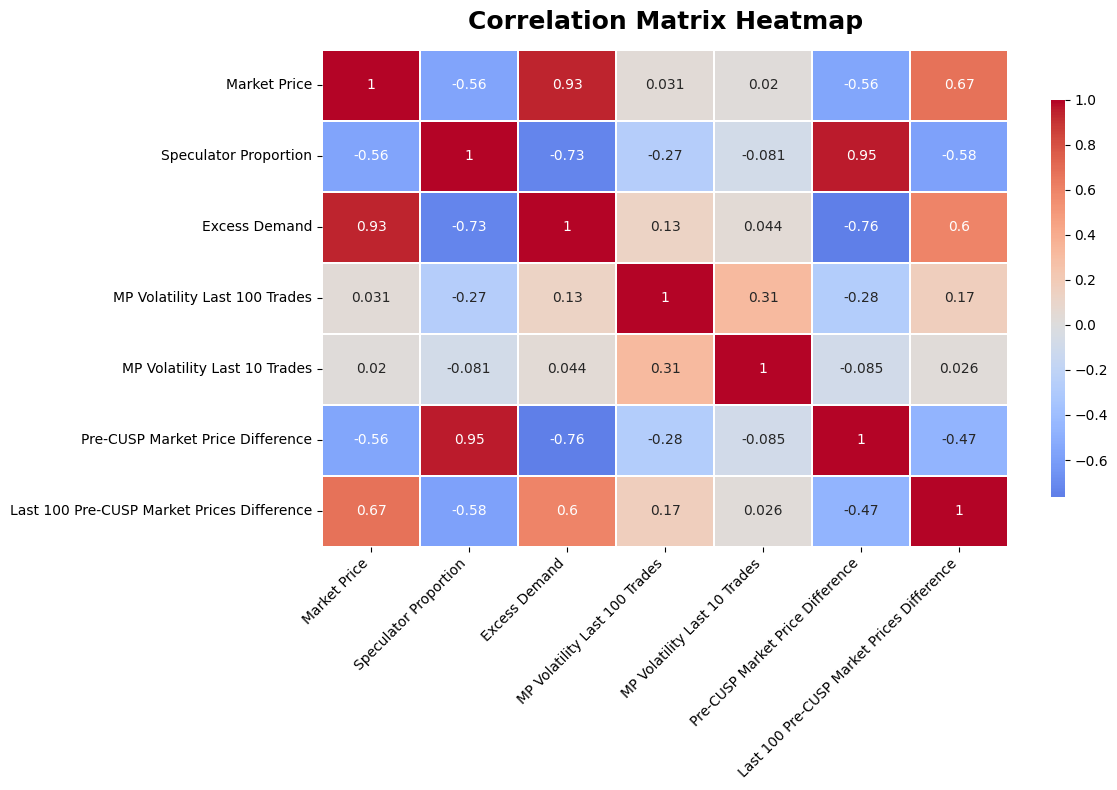

In [259]:
df_2 = df.copy()
corr_cols = [
    'Market Price', 'Speculator Proportion', 'Excess Demand', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# df_2 = df_2[columns_of_interest]
df_2 = df_2[corr_cols]
corr_matrix = df_2.corr()
corr_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  
    annot_kws={"size": 10}, 
)
plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

# Markets Price in Last 3000 Trades Pre-Crash

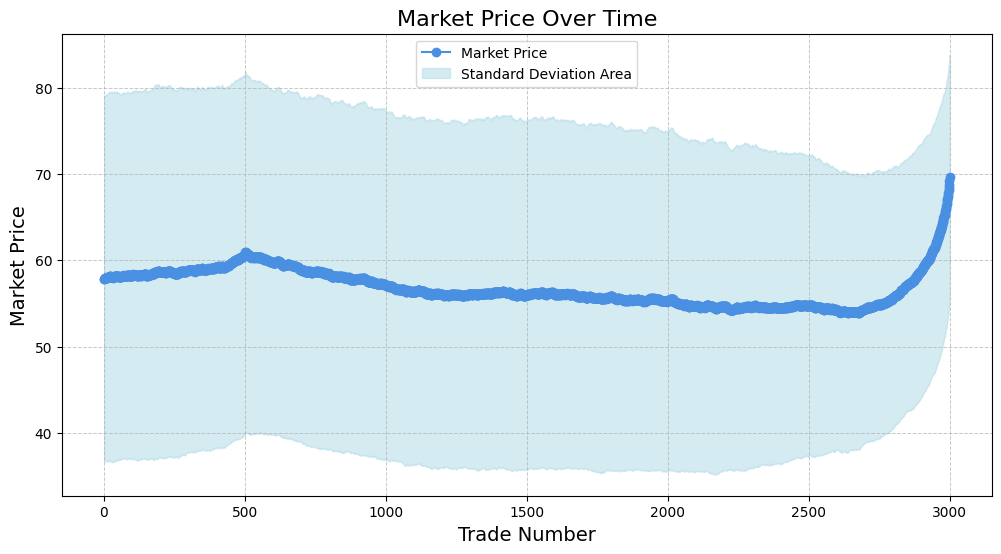

In [260]:
trade_number = df['Trade Number']
market_price = df['Market Price']
market_price_std = df['Market Price STDV']

upper_bound = market_price + market_price_std
lower_bound = market_price - market_price_std

plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, market_price, 
    marker='o', linestyle='-', color='#4A90E2', label='Market Price'
)

plt.fill_between(trade_number, lower_bound, upper_bound, color='lightblue', alpha=0.5, label='Standard Deviation Area')

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Market Price', fontsize=14)
plt.title('Market Price Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


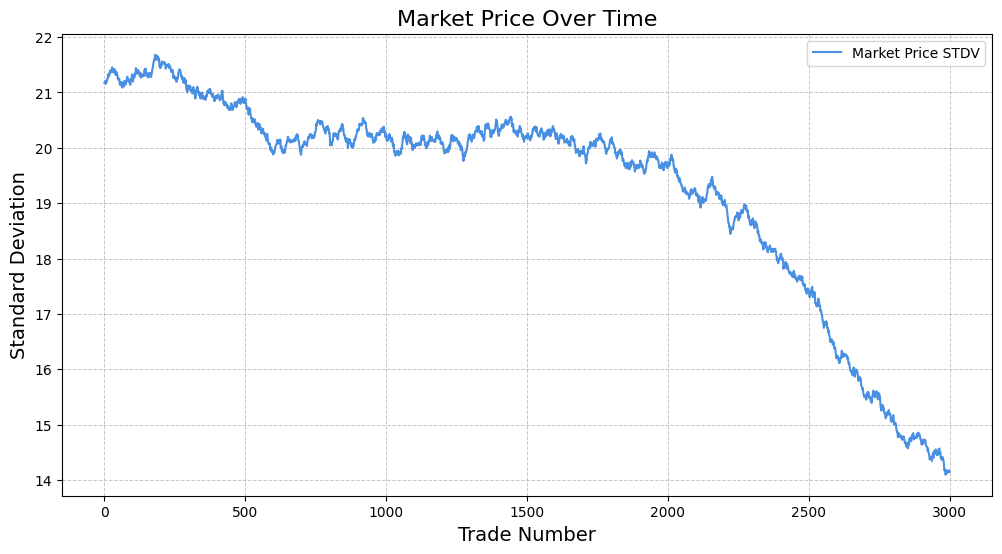

In [261]:
plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, market_price_std, 
    linestyle='-', color='#4A90E2', label='Market Price STDV'
)

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Market Price Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

In [262]:
std_dev_1 = df.loc[1999, 'Market Price STDV']
std_dev_2 = df.loc[2999, 'Market Price STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
percentage_change

np.float64(-39.1735289549663)

# Excess Demand In Last 3000 trades pre catastrophe

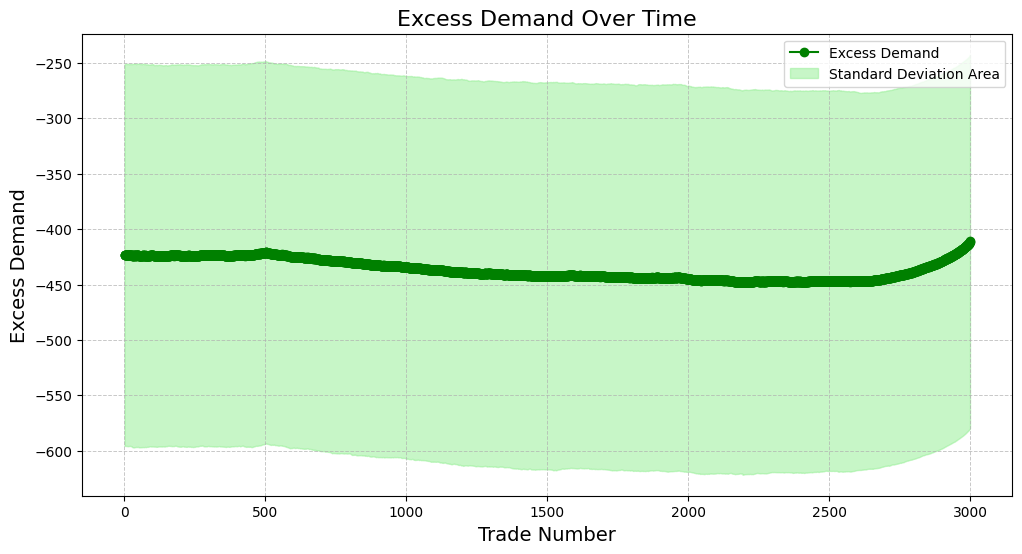

In [263]:
trade_number = df['Trade Number']
excess_demand = df['Excess Demand']
excess_demand_std = df['Excess Demand STDV']  # Assuming this column exists

upper_bound = excess_demand + excess_demand_std
lower_bound = excess_demand - excess_demand_std

plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, excess_demand, 
    marker='o', linestyle='-', color='g', label='Excess Demand'  # Using green
)

plt.fill_between(trade_number, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label='Standard Deviation Area')

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Excess Demand', fontsize=14)
plt.title('Excess Demand Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


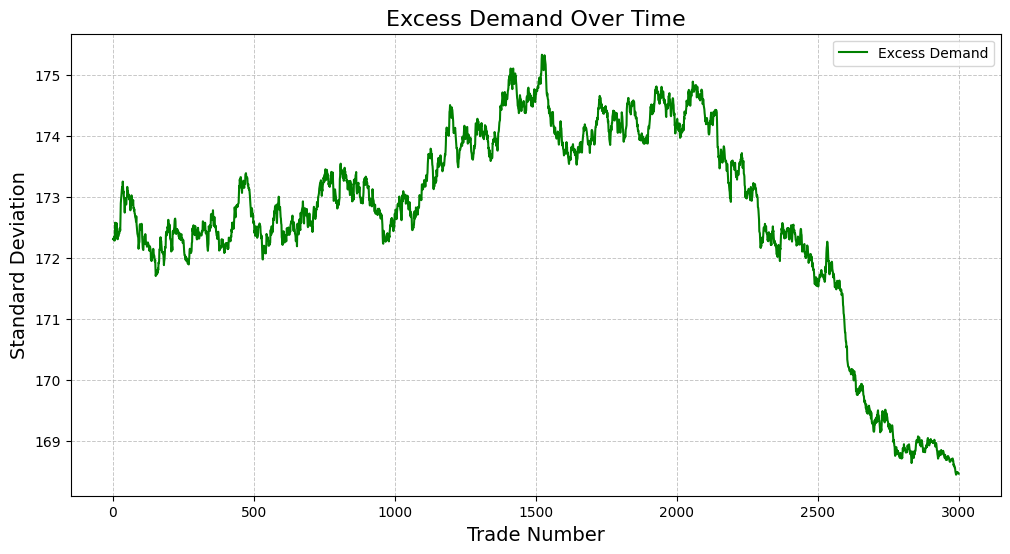

In [264]:
plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, excess_demand_std, 
    linestyle='-', color='g', label='Excess Demand'  
)

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Excess Demand Over Time', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


In [265]:
std_dev_1 = df.loc[0, 'Excess Demand STDV']
std_dev_2 = df.loc[1999, 'Excess Demand STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
percentage_change

np.float64(1.0724072014511443)

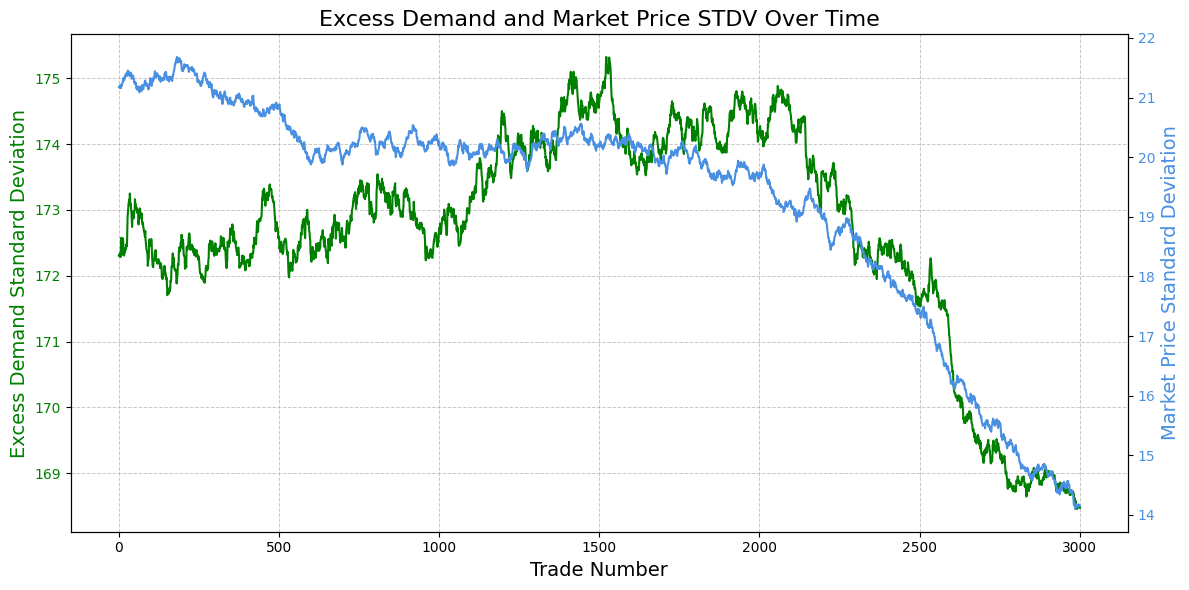

In [266]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Excess Demand on the first y-axis
ax1.plot(
    trade_number, excess_demand_std, 
    linestyle='-', color='g', label='Excess Demand'
)
ax1.set_xlabel('Trade Number', fontsize=14)
ax1.set_ylabel('Excess Demand Standard Deviation', fontsize=14, color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Create the second y-axis for Market Price STDV
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.plot(
    trade_number, market_price_std, 
    linestyle='-', color='#4A90E2', label='Market Price STDV'
)
ax2.set_ylabel('Market Price Standard Deviation', fontsize=14, color='#4A90E2')
ax2.tick_params(axis='y', labelcolor='#4A90E2')

# Add a title and show the plot
plt.title('Excess Demand and Market Price STDV Over Time', fontsize=16)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Determining Volatilty Values; Last 10, Last 100

In [267]:
df_1 = df.copy()
df_1['Returns'] = df_1['Market Price'].pct_change()

# Calculate rolling volatility for every 10 and 100 trades
df_1['Volatility'] = df_1['Returns'].rolling(window=2).std() 
df_1['Volatility_10'] = df_1['Returns'].rolling(window=10).std()  # 10 trades
df_1['Volatility_100'] = df_1['Returns'].rolling(window=100).std()  # 100 trades

df_1

,Trade Number,Market Price,Excess Demand,Speculator Proportion,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Pre-CUSP Market Price Difference,...,Kurtosis ED STDV,Kurtosis SP STDV,MP Volatility Last 100 Trades STDV,MP Volatility Last 10 Trades STDV,Pre-CUSP Market Price Difference STDV,Last 100 Pre-CUSP Market Prices Difference STDV,Returns,Volatility,Volatility_10,Volatility_100
0,1,57.858845,-423.512712,64.929110,NaN,NaN,NaN,1.361142,1.019798,0.000000,...,NaN,NaN,2.810937,2.369402,0.000000,6.021920,NaN,NaN,NaN,NaN
1,2,57.879237,-423.416314,64.929110,NaN,NaN,NaN,1.360488,1.017989,0.371239,...,NaN,NaN,2.805064,2.204797,1.165114,6.046718,0.000352,NaN,NaN,NaN
2,3,57.898358,-423.309322,64.929195,NaN,NaN,NaN,1.353794,1.040661,0.623994,...,NaN,NaN,2.781593,2.250122,1.528524,6.044824,0.000330,0.000016,NaN,NaN
3,4,57.934216,-423.326271,64.929195,NaN,NaN,NaN,1.356980,1.083841,0.875000,...,NaN,NaN,2.779695,2.481676,1.806351,6.053702,0.000619,0.000204,NaN,NaN
4,5,57.939831,-423.294492,64.929195,NaN,NaN,NaN,1.357059,1.121925,1.161653,...,NaN,NaN,2.776856,2.610105,2.059820,6.060557,0.000097,0.000369,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,68.099364,-412.885593,64.974661,NaN,NaN,NaN,1.180768,0.811957,53.117956,...,NaN,NaN,2.109885,1.552865,10.545251,6.192643,0.004208,0.000019,0.000704,0.000944
2996,2997,68.417956,-412.641949,64.974661,NaN,NaN,NaN,1.177012,0.792129,53.140996,...,NaN,NaN,2.099712,1.384544,10.544969,6.230889,0.004678,0.000332,0.000816,0.000994
2997,2998,68.755720,-412.335805,64.974661,NaN,NaN,NaN,1.175653,0.775333,53.178284,...,NaN,NaN,2.095393,1.255953,10.523688,6.298852,0.004937,0.000183,0.000886,0.001050
2998,2999,69.198411,-412.036017,64.974661,NaN,NaN,NaN,1.190191,0.827145,53.226006,...,NaN,NaN,2.133634,1.822463,10.510508,6.346058,0.006439,0.001062,0.001185,0.001143


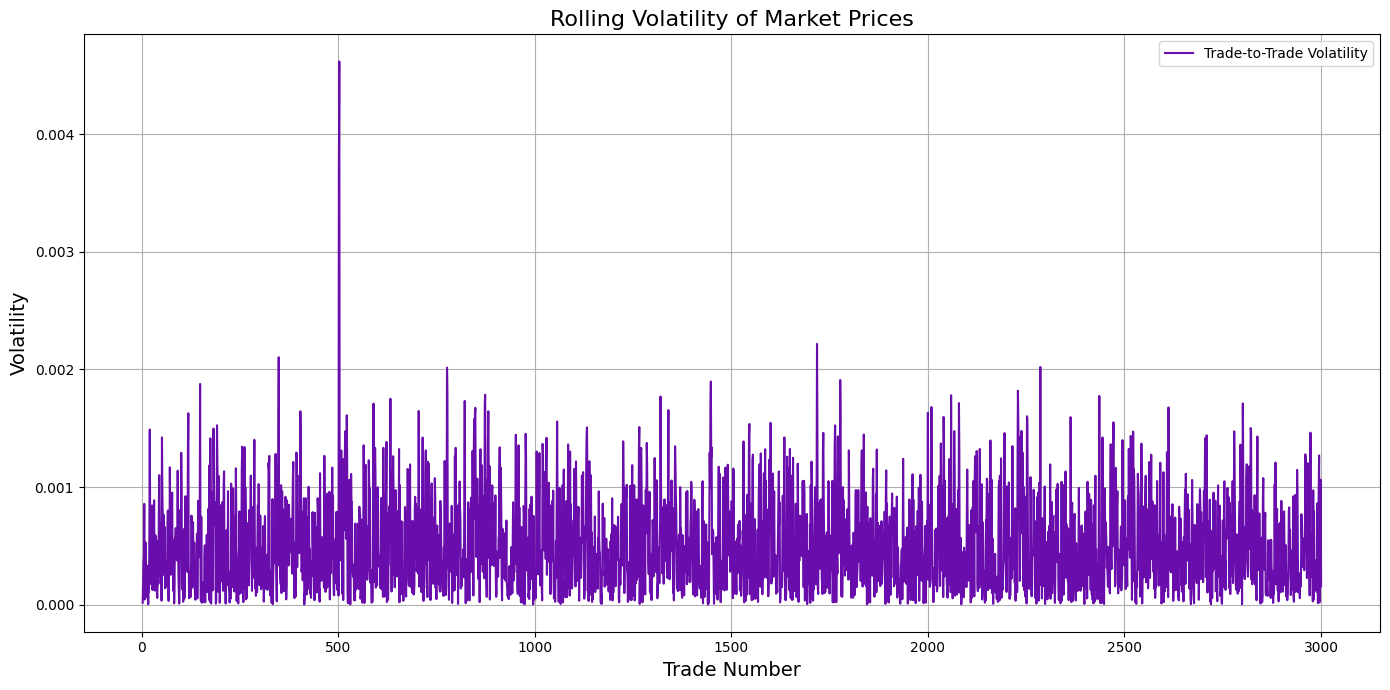

In [268]:
# Plotting the volatility
plt.figure(figsize=(14, 7))
plt.plot(df_1['Trade Number'], df_1['Volatility'], label='Trade-to-Trade Volatility', color='#6A0DAD')

# Adding labels and title
plt.title('Rolling Volatility of Market Prices', fontsize=16)
plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


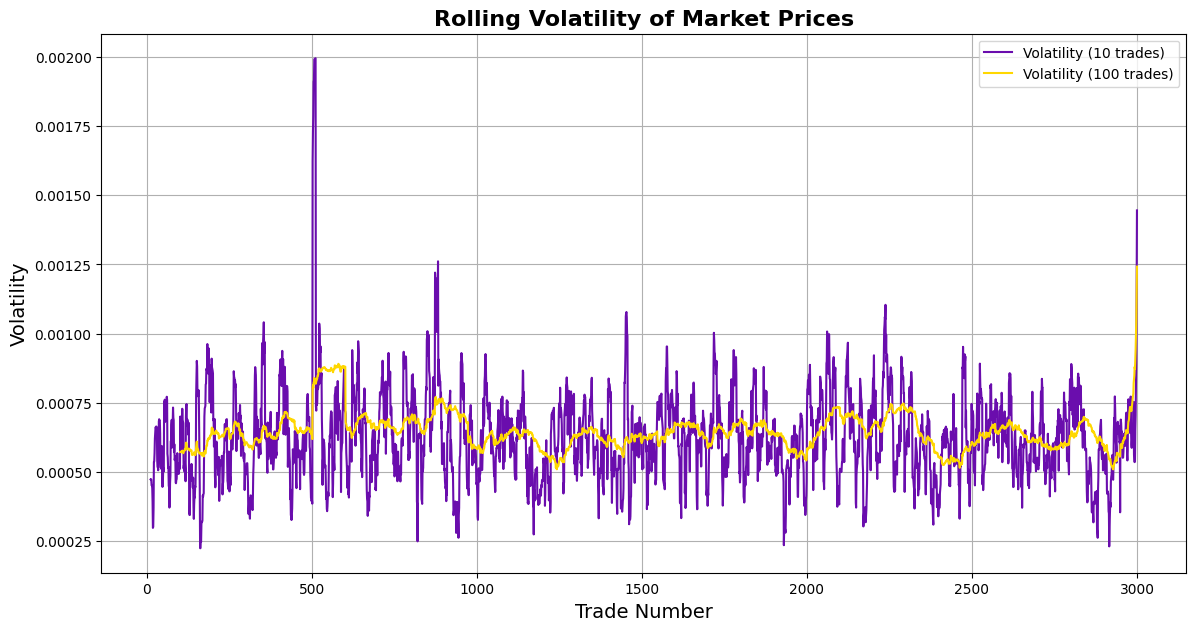

In [269]:
plt.figure(figsize=(14, 7))
plt.plot(df_1['Trade Number'], df_1['Volatility_10'], label='Volatility (10 trades)', color='#6A0DAD')  # Purple
plt.plot(df_1['Trade Number'], df_1['Volatility_100'], label='Volatility (100 trades)', color='#FFD700')  # Yellow

# Adding labels and title
plt.title('Rolling Volatility of Market Prices', fontsize=16, weight='bold')
plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid()

# Show plot
plt.show()


In [270]:
df_last_500 = df_1.copy()
df_last_500 = df_last_500.iloc[2500:3000]
df_last_500

,Trade Number,Market Price,Excess Demand,Speculator Proportion,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Pre-CUSP Market Price Difference,...,Kurtosis ED STDV,Kurtosis SP STDV,MP Volatility Last 100 Trades STDV,MP Volatility Last 10 Trades STDV,Pre-CUSP Market Price Difference STDV,Last 100 Pre-CUSP Market Prices Difference STDV,Returns,Volatility,Volatility_10,Volatility_100
2500,2501,54.739989,-446.774364,64.969110,NaN,NaN,NaN,1.298837,1.079581,50.029131,...,NaN,NaN,2.707114,5.098609,12.025211,6.156981,-0.000601,0.000343,0.000720,0.000607
2501,2502,54.751059,-446.636653,64.969110,NaN,NaN,NaN,1.292528,1.089859,50.036864,...,NaN,NaN,2.706628,5.105198,12.024369,6.145512,0.000202,0.000568,0.000722,0.000606
2502,2503,54.751907,-446.581568,64.969195,NaN,NaN,NaN,1.294412,1.057896,50.042638,...,NaN,NaN,2.705922,5.052540,12.022092,6.160400,0.000015,0.000132,0.000716,0.000603
2503,2504,54.778919,-446.623941,64.969195,NaN,NaN,NaN,1.294584,1.143169,50.056462,...,NaN,NaN,2.711711,6.151440,12.025916,6.212673,0.000493,0.000338,0.000704,0.000603
2504,2505,54.763136,-446.621822,64.969195,NaN,NaN,NaN,1.282771,0.775506,50.068803,...,NaN,NaN,2.706758,1.170448,12.022282,6.232995,-0.000288,0.000553,0.000540,0.000601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,68.099364,-412.885593,64.974661,NaN,NaN,NaN,1.180768,0.811957,53.117956,...,NaN,NaN,2.109885,1.552865,10.545251,6.192643,0.004208,0.000019,0.000704,0.000944
2996,2997,68.417956,-412.641949,64.974661,NaN,NaN,NaN,1.177012,0.792129,53.140996,...,NaN,NaN,2.099712,1.384544,10.544969,6.230889,0.004678,0.000332,0.000816,0.000994
2997,2998,68.755720,-412.335805,64.974661,NaN,NaN,NaN,1.175653,0.775333,53.178284,...,NaN,NaN,2.095393,1.255953,10.523688,6.298852,0.004937,0.000183,0.000886,0.001050
2998,2999,69.198411,-412.036017,64.974661,NaN,NaN,NaN,1.190191,0.827145,53.226006,...,NaN,NaN,2.133634,1.822463,10.510508,6.346058,0.006439,0.001062,0.001185,0.001143


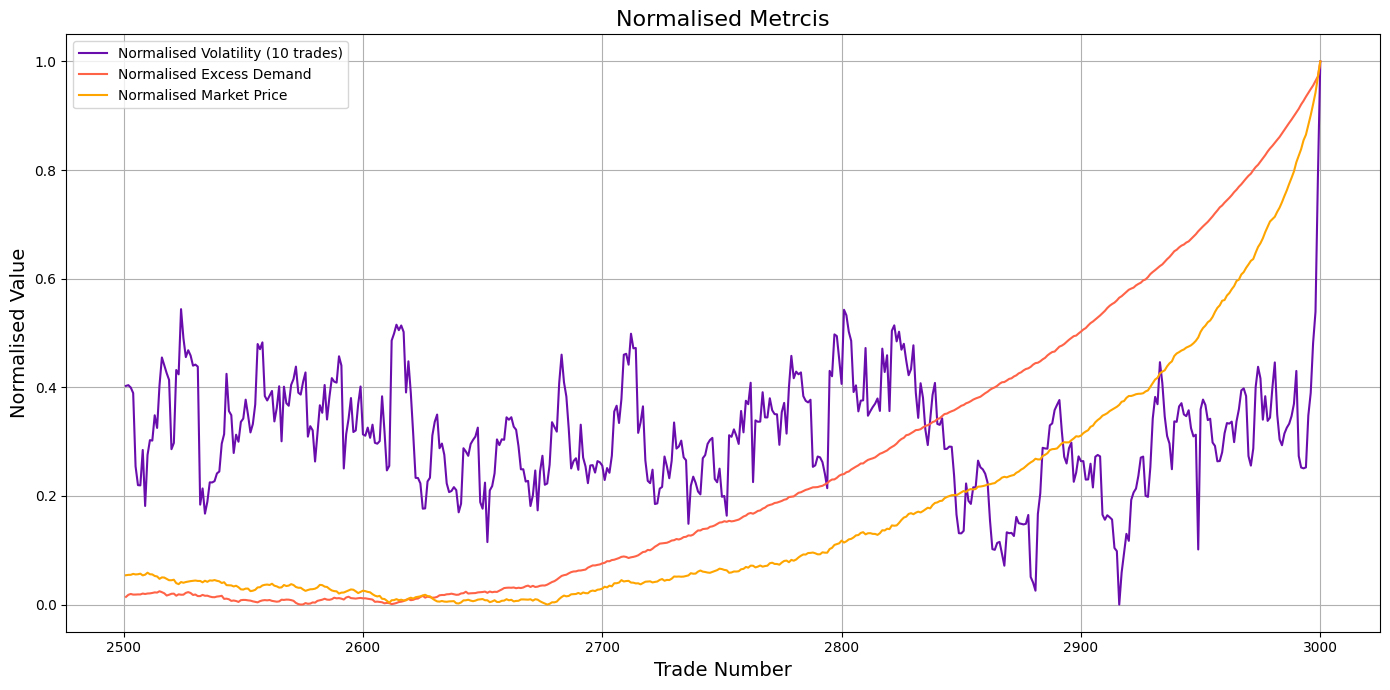

In [283]:
scaler = MinMaxScaler()
df_last_500[['Volatility_10', 'Excess Demand', 'Market Price']] = scaler.fit_transform(
    df_last_500[['Volatility_10', 'Excess Demand', 'Market Price']]
)

# Plotting the normalised volatility, excess demand, and market price
plt.figure(figsize=(14, 7))

# Plot each normalised series with different labels and colors
plt.plot(df_last_500['Trade Number'], df_last_500['Volatility_10'], 
         label='Normalised Volatility (10 trades)', color='#6A0DAD')
plt.plot(df_last_500['Trade Number'], df_last_500['Excess Demand'], 
         label='Normalised Excess Demand', color='#FF6347')
plt.plot(df_last_500['Trade Number'], df_last_500['Market Price'], 
         label='Normalised Market Price', color='#FFA500')

# Adding labels, title, and legend
plt.title('Normalised Metrcis', fontsize=16)
plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Normalised Value', fontsize=14)
plt.legend(loc='best')
plt.grid()

# Show plot with adjusted layout
plt.tight_layout()
plt.show()

C:\Users\Ricky\AppData\Local\Temp\ipykernel_808\1104094952.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_1000['Log_Returns'] = np.log(df_last_1000['Market Price']).diff()


Skewness of Returns: 1.6330
Kurtosis of Returns (Excess): 6.1790


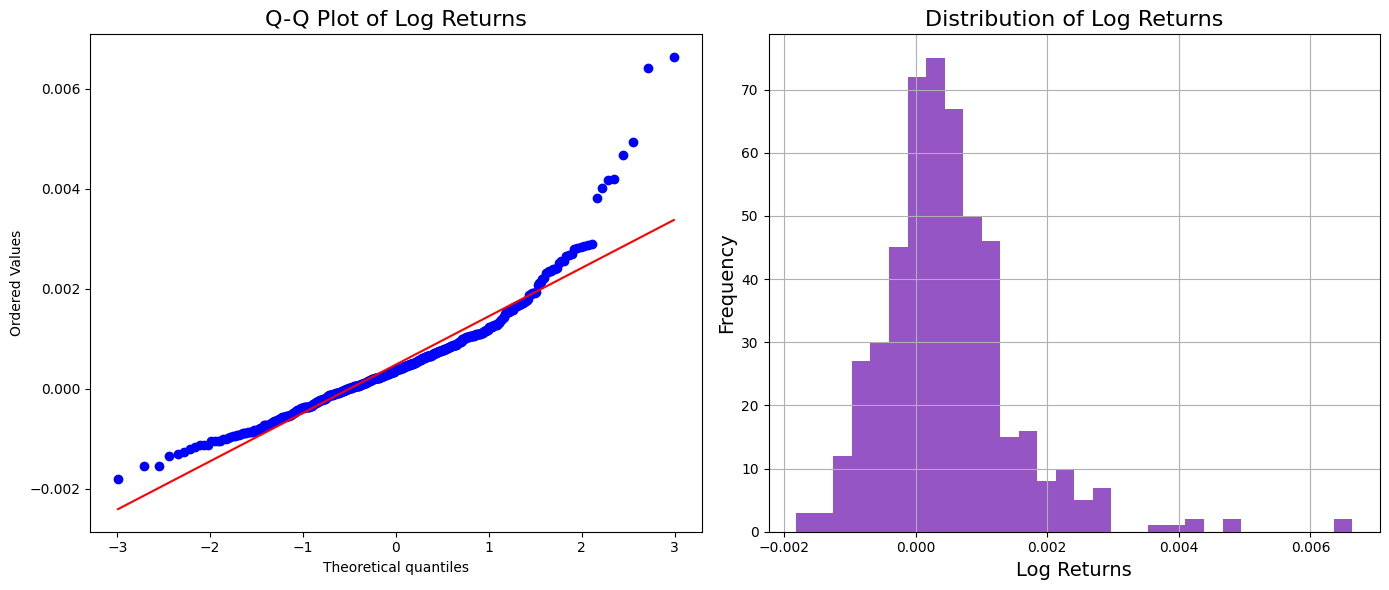

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_1 is already defined and contains a 'Market Price' column

# STEP 1: Compute Log Returns
df_last_1000 = df_1.tail(500)  # Select the last 500 trades
df_last_1000['Log_Returns'] = np.log(df_last_1000['Market Price']).diff()

# STEP 2: Remove NaN values caused by the diff() operation
df_last_1000 = df_last_1000[df_last_1000['Log_Returns'].notna()]

# STEP 3: Calculate Skewness and Kurtosis
returns_skewness = skew(df_last_1000['Log_Returns'])
returns_kurtosis = kurtosis(df_last_1000['Log_Returns'], fisher=True)  # Fisher=True gives excess kurtosis

# Print the skewness and kurtosis results
print(f"Skewness of Returns: {returns_skewness:.4f}")
print(f"Kurtosis of Returns (Excess): {returns_kurtosis:.4f}")

# STEP 4: Plotting
plt.figure(figsize=(14, 6))

# Q-Q Plot for Skewness
plt.subplot(1, 2, 1)
probplot(df_last_1000['Log_Returns'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log Returns', fontsize=16)

# Histogram for Kurtosis
plt.subplot(1, 2, 2)
plt.hist(df_last_1000['Log_Returns'], bins=30, alpha=0.7, color='#6A0DAD')
plt.title('Distribution of Log Returns', fontsize=16)
plt.xlabel('Log Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


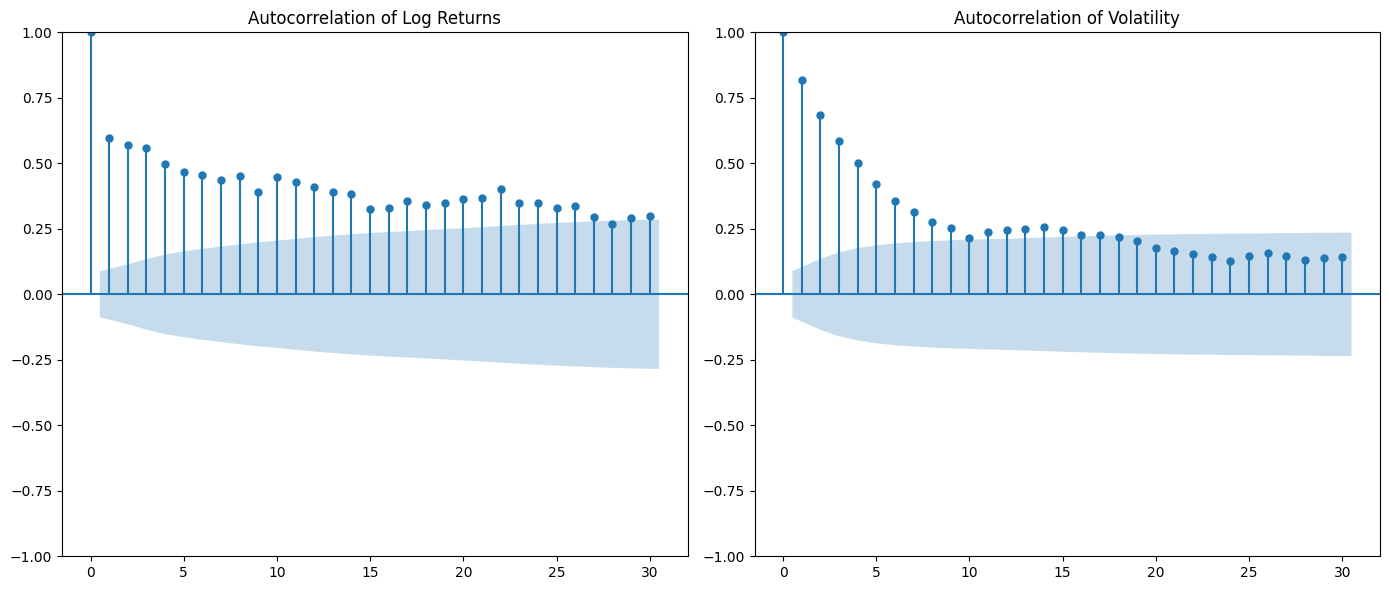

Autocorrelation of Log Returns (Lag 1): 0.6192
Autocorrelation of Volatility (Lag 1): 0.8549
Log returns show significant positive autocorrelation, indicating predictability.
Volatility shows significant positive autocorrelation, indicating potential clustering.


In [284]:
# Step 1: Calculate the Volatility using a rolling window (if not already done)
df_last_1000['Volatility_10'] = df_last_1000['Log_Returns'].rolling(window=10).std()

# Step 2: Plot Autocorrelation for Log Returns
plt.figure(figsize=(14, 6))

# Subplot for Log Returns Autocorrelation
plt.subplot(1, 2, 1)
plot_acf(df_last_1000['Log_Returns'].dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelation of Log Returns')

# Step 3: Plot Autocorrelation for Volatility
plt.subplot(1, 2, 2)
plot_acf(df_last_1000['Volatility_10'].dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelation of Volatility')

plt.tight_layout()
plt.show()

# Step 4: Summary of Predictability and Instability
log_returns_acf = df_last_1000['Log_Returns'].autocorr(lag=1)  # First lag autocorrelation
volatility_acf = df_last_1000['Volatility_10'].autocorr(lag=1)  # First lag autocorrelation

print(f"Autocorrelation of Log Returns (Lag 1): {log_returns_acf:.4f}")
print(f"Autocorrelation of Volatility (Lag 1): {volatility_acf:.4f}")

if log_returns_acf > 0.5:
    print("Log returns show significant positive autocorrelation, indicating predictability.")
else:
    print("Log returns do not show significant autocorrelation, indicating less predictability.")

if volatility_acf > 0.5:
    print("Volatility shows significant positive autocorrelation, indicating potential clustering.")
else:
    print("Volatility does not show significant autocorrelation, indicating less predictability.")

    Lag  Log Returns ACF  Volatility ACF
0     0         1.000000        1.000000
1     1         0.619235        0.852309
2     2         0.615874        0.728972
3     3         0.619377        0.622496
4     4         0.560964        0.532471
5     5         0.537630        0.446817
6     6         0.536479        0.373175
7     7         0.516793        0.327179
8     8         0.541487        0.288190
9     9         0.474643        0.261221
10   10         0.548156        0.221520
11   11         0.533766        0.250781
12   12         0.515482        0.263182
13   13         0.499190        0.269366
14   14         0.493758        0.275359
15   15         0.422411        0.259312
16   16         0.435308        0.238537
17   17         0.473298        0.231433
18   18         0.456589        0.222351
19   19         0.466220        0.207620
20   20         0.490380        0.188047
21   21         0.499271        0.175724
22   22         0.549157        0.165126
23   23         

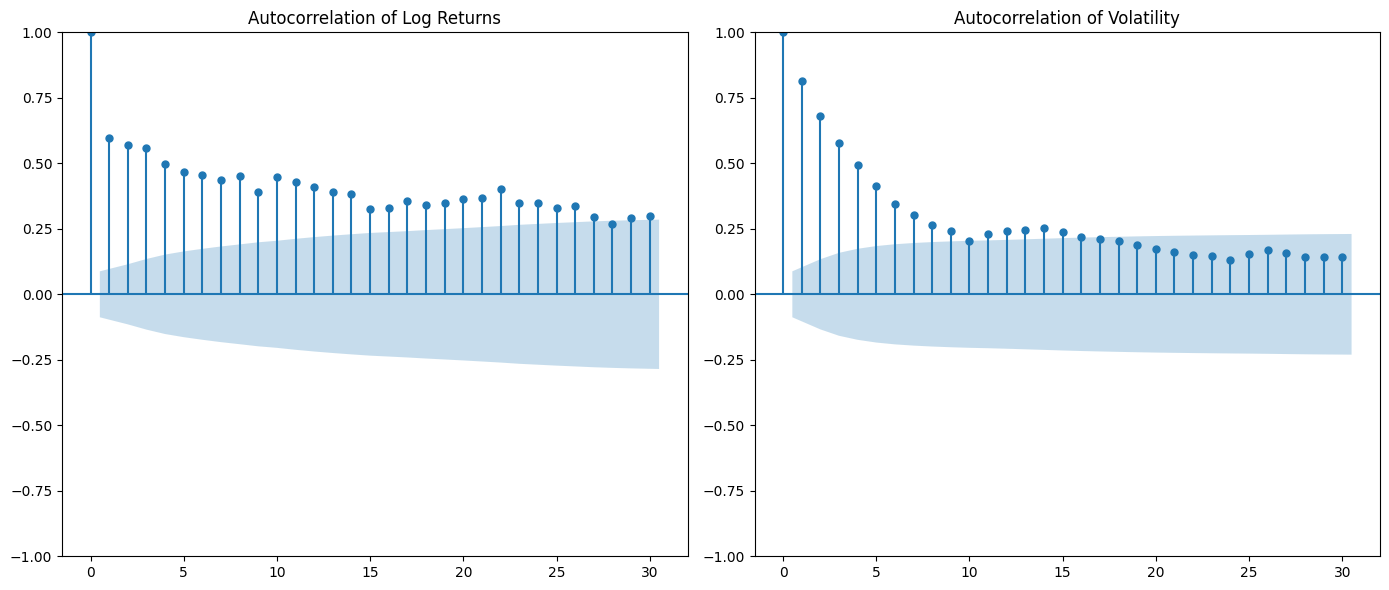

Log returns ACF at lag 1 is 0.6192, indicating significant positive autocorrelation.
Volatility ACF at lag 1 is 0.8523, indicating significant positive autocorrelation.
Log returns ACF at lag 2 is 0.6159, indicating significant positive autocorrelation.
Volatility ACF at lag 2 is 0.7290, indicating significant positive autocorrelation.
Log returns ACF at lag 3 is 0.6194, indicating significant positive autocorrelation.
Volatility ACF at lag 3 is 0.6225, indicating significant positive autocorrelation.
Log returns ACF at lag 4 is 0.5610, indicating significant positive autocorrelation.
Volatility ACF at lag 4 is 0.5325, indicating significant positive autocorrelation.
Log returns ACF at lag 5 is 0.5376, indicating significant positive autocorrelation.
Volatility ACF at lag 5 is 0.4468, indicating less predictability.
Log returns ACF at lag 6 is 0.5365, indicating significant positive autocorrelation.
Volatility ACF at lag 6 is 0.3732, indicating less predictability.
Log returns ACF at l

In [290]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming df_last_1000 is already defined and contains Log_Returns and Volatility_10

# Step 1: Calculate autocorrelation for a range of lags
max_lag = 30  # Set maximum lag to consider
log_returns_acf = [df_last_1000['Log_Returns'].autocorr(lag=i) for i in range(max_lag + 1)]
volatility_acf = [df_last_1000['Volatility_10'].autocorr(lag=i) for i in range(max_lag + 1)]

# Step 2: Create a DataFrame for better presentation
acf_df = pd.DataFrame({
    'Lag': range(max_lag + 1),
    'Log Returns ACF': log_returns_acf,
    'Volatility ACF': volatility_acf
})

# Step 3: Print the autocorrelation DataFrame
print(acf_df)

# Step 4: Plot Autocorrelation Function (ACF) for both Log Returns and Volatility
plt.figure(figsize=(14, 6))

# Subplot for Log Returns Autocorrelation
plt.subplot(1, 2, 1)
plot_acf(df_last_1000['Log_Returns'].dropna(), lags=max_lag, ax=plt.gca())
plt.title('Autocorrelation of Log Returns')

# Subplot for Volatility Autocorrelation
plt.subplot(1, 2, 2)
plot_acf(df_last_1000['Volatility_10'].dropna(), lags=max_lag, ax=plt.gca())
plt.title('Autocorrelation of Volatility')

plt.tight_layout()
plt.show()

# Step 5: Provide interpretation for all autocorrelation values
for i in range(1, max_lag + 1):
    log_return_acf_value = log_returns_acf[i]
    volatility_acf_value = volatility_acf[i]

    if log_return_acf_value > 0.5:
        print(f"Log returns ACF at lag {i} is {log_return_acf_value:.4f}, indicating significant positive autocorrelation.")
    else:
        print(f"Log returns ACF at lag {i} is {log_return_acf_value:.4f}, indicating less predictability.")

    if volatility_acf_value > 0.5:
        print(f"Volatility ACF at lag {i} is {volatility_acf_value:.4f}, indicating significant positive autocorrelation.")
    else:
        print(f"Volatility ACF at lag {i} is {volatility_acf_value:.4f}, indicating less predictability.")


C:\Users\Ricky\AppData\Local\Temp\ipykernel_808\3521758362.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_1000['Log_Returns'] = np.log(df_last_1000['Market Price']).diff()


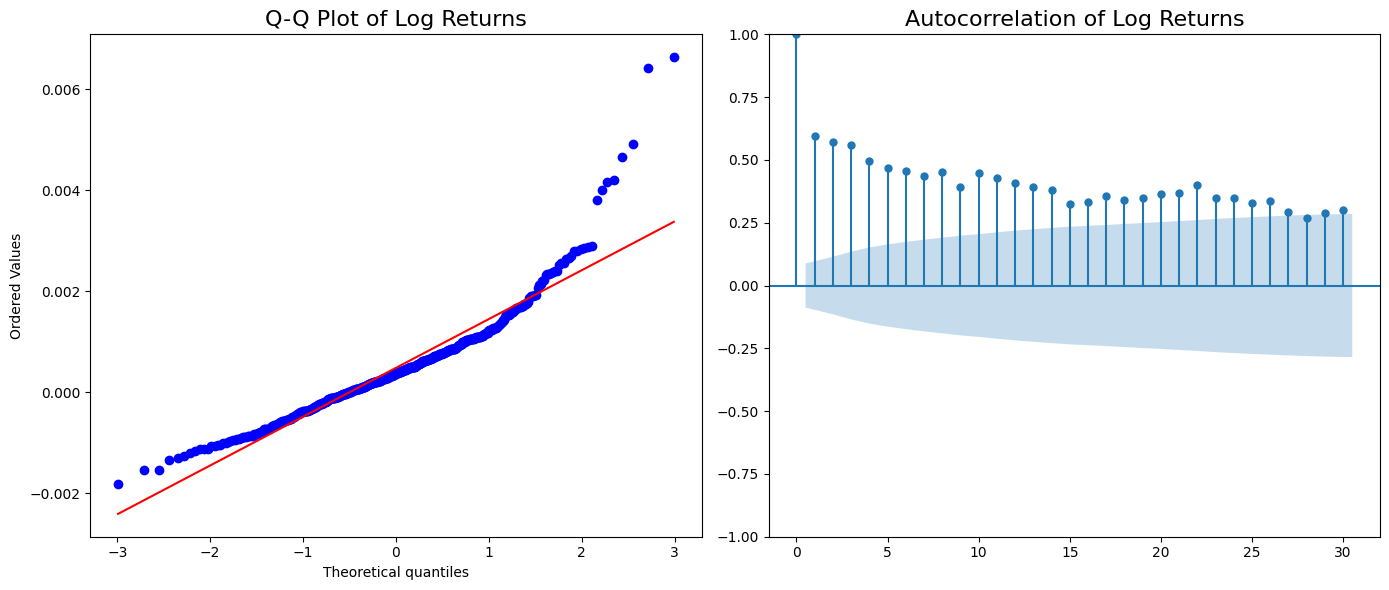

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from statsmodels.graphics.tsaplots import plot_acf

# Assuming df_1 is already defined and contains a 'Market Price' column

# STEP 1: Compute Log Returns
df_last_1000 = df_1.tail(500)  # Select the last 500 trades
df_last_1000['Log_Returns'] = np.log(df_last_1000['Market Price']).diff()

# STEP 2: Remove NaN values caused by the diff() operation
df_last_1000 = df_last_1000[df_last_1000['Log_Returns'].notna()]

# STEP 3: Plotting

# Create a figure for Q-Q Plot and Autocorrelation
plt.figure(figsize=(14, 6))

# Q-Q Plot for Log Returns
plt.subplot(1, 2, 1)
probplot(df_last_1000['Log_Returns'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log Returns', fontsize=16)

# Autocorrelation of Log Returns
plt.subplot(1, 2, 2)
plot_acf(df_last_1000['Log_Returns'].dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelation of Log Returns', fontsize=16)

plt.tight_layout()
plt.show()


In [274]:
volatility_surge_trade = 2900

# Step 2: Calculate Z-scores for the 10-trade volatility
df_1['Z_Scores'] = zscore(df_1['Volatility'])
df_1

,Trade Number,Market Price,Excess Demand,Speculator Proportion,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Pre-CUSP Market Price Difference,...,Kurtosis SP STDV,MP Volatility Last 100 Trades STDV,MP Volatility Last 10 Trades STDV,Pre-CUSP Market Price Difference STDV,Last 100 Pre-CUSP Market Prices Difference STDV,Returns,Volatility,Volatility_10,Volatility_100,Z_Scores
0,1,57.858845,-423.512712,64.929110,NaN,NaN,NaN,1.361142,1.019798,0.000000,...,NaN,2.810937,2.369402,0.000000,6.021920,NaN,NaN,NaN,NaN,NaN
1,2,57.879237,-423.416314,64.929110,NaN,NaN,NaN,1.360488,1.017989,0.371239,...,NaN,2.805064,2.204797,1.165114,6.046718,0.000352,NaN,NaN,NaN,NaN
2,3,57.898358,-423.309322,64.929195,NaN,NaN,NaN,1.353794,1.040661,0.623994,...,NaN,2.781593,2.250122,1.528524,6.044824,0.000330,0.000016,NaN,NaN,NaN
3,4,57.934216,-423.326271,64.929195,NaN,NaN,NaN,1.356980,1.083841,0.875000,...,NaN,2.779695,2.481676,1.806351,6.053702,0.000619,0.000204,NaN,NaN,NaN
4,5,57.939831,-423.294492,64.929195,NaN,NaN,NaN,1.357059,1.121925,1.161653,...,NaN,2.776856,2.610105,2.059820,6.060557,0.000097,0.000369,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,68.099364,-412.885593,64.974661,NaN,NaN,NaN,1.180768,0.811957,53.117956,...,NaN,2.109885,1.552865,10.545251,6.192643,0.004208,0.000019,0.000704,0.000944,NaN
2996,2997,68.417956,-412.641949,64.974661,NaN,NaN,NaN,1.177012,0.792129,53.140996,...,NaN,2.099712,1.384544,10.544969,6.230889,0.004678,0.000332,0.000816,0.000994,NaN
2997,2998,68.755720,-412.335805,64.974661,NaN,NaN,NaN,1.175653,0.775333,53.178284,...,NaN,2.095393,1.255953,10.523688,6.298852,0.004937,0.000183,0.000886,0.001050,NaN
2998,2999,69.198411,-412.036017,64.974661,NaN,NaN,NaN,1.190191,0.827145,53.226006,...,NaN,2.133634,1.822463,10.510508,6.346058,0.006439,0.001062,0.001185,0.001143,NaN


# Z-Score

In [275]:
# Step 1: Calculate Z-scores for volatility
df_last_500['Z_Scores'] = zscore(df_last_500['Volatility'])

# Step 2: Analyze the trades
print("Last 500 Trades Analysis:")
for i in range(N):
    trade_number = collapse_trade_count - (N - i)
    price = df_last_500['Market Price'].iloc[i]
    volatility = df_last_500['Volatility'].iloc[i]
    z_score = df_last_500['Z_Scores'].iloc[i]
    
    print(f"Trade {trade_number}: Price = {price:.4f}, Volatility = {volatility:.4f}, Z-Score = {z_score:.4f}")

# Step 3: Identify patterns leading to the collapse
collapse_threshold = 0.05  # For example, looking for a 5% drop
initial_price = df_last_500['Market Price'].iloc[0]  # Price of the first trade in the last 500 trades

collapse_signal_detected = False
for i in range(N):
    if df_last_500['Market Price'].iloc[i] <= initial_price * (1 - collapse_threshold):
        collapse_signal_detected = True
        print(f"Potential collapse signal detected at trade {collapse_trade_count - (N - i)} with a price drop.")
        break

# Conclusion
if not collapse_signal_detected:
    print("No collapse signal detected in the last trades leading to the final collapse.")

Last 500 Trades Analysis:
Trade 2900: Price = 0.0540, Volatility = 0.0003, Z-Score = -0.4370
Trade 2901: Price = 0.0547, Volatility = 0.0006, Z-Score = 0.1924
Trade 2902: Price = 0.0548, Volatility = 0.0001, Z-Score = -1.0240
Trade 2903: Price = 0.0565, Volatility = 0.0003, Z-Score = -0.4500
Trade 2904: Price = 0.0555, Volatility = 0.0006, Z-Score = 0.1487
Trade 2905: Price = 0.0558, Volatility = 0.0003, Z-Score = -0.6334
Trade 2906: Price = 0.0569, Volatility = 0.0002, Z-Score = -0.9575
Trade 2907: Price = 0.0537, Volatility = 0.0009, Z-Score = 1.0536
Trade 2908: Price = 0.0550, Volatility = 0.0009, Z-Score = 1.1857
Trade 2909: Price = 0.0587, Volatility = 0.0005, Z-Score = -0.0861
Trade 2910: Price = 0.0558, Volatility = 0.0013, Z-Score = 2.2985
Trade 2911: Price = 0.0555, Volatility = 0.0005, Z-Score = 0.0575
Trade 2912: Price = 0.0527, Volatility = 0.0005, Z-Score = 0.0437
Trade 2913: Price = 0.0518, Volatility = 0.0004, Z-Score = -0.2790
Trade 2914: Price = 0.0474, Volatility = 0.

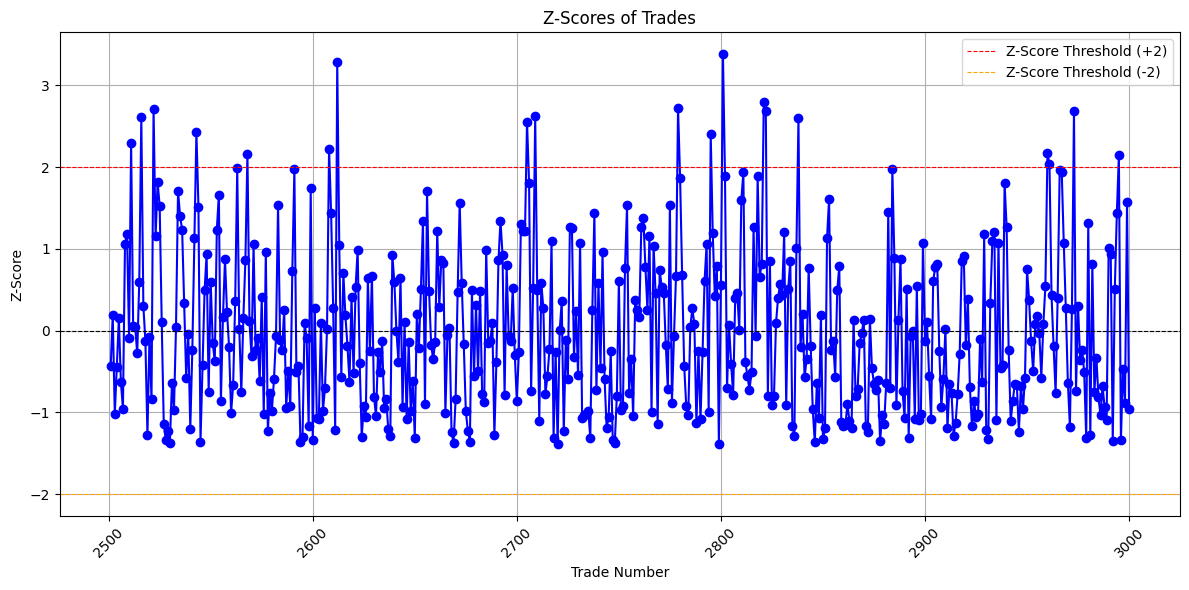

In [282]:
df_last_500['Z_Scores'] = zscore(df_last_500['Volatility'])
df_z_scores = pd.DataFrame(df_last_500)

df_z_scores

plt.figure(figsize=(12, 6))
plt.plot(df_z_scores["Trade Number"], df_z_scores["Z_Scores"], marker='o', linestyle='-', color='b')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axhline(2, color='red', linewidth=0.8, linestyle='--', label='Z-Score Threshold (+2)')
plt.axhline(-2, color='orange', linewidth=0.8, linestyle='--', label='Z-Score Threshold (-2)')
plt.title('Z-Scores of Trades')
plt.xlabel('Trade Number')
plt.ylabel('Z-Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()